In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from IPython.core.display import HTML
HTML("<style>.container { width:90% !important; }</style>")

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt
from tqdm import tqdm_notebook as tqdm
from math import sqrt

In [4]:
from forecaster import *
from environment import *

In [5]:
sig = 1e-0
rbf_kernel = lambda x0,x1: np.exp(-np.linalg.norm(x0-x1)**2/(2*sig**2))
square_loss = lambda p,y: (p-y)**2
timeout = 20
d = 5
n = 1000

In [6]:
FODG_L = run_with_adversary(d, n, square_loss, Fourier_online_GD_reg(d, 100, sig, 1./sqrt(n)), oracle_kernel=rbf_kernel, timeout=timeout)

In [7]:
pros_n_kons_L = run_with_adversary(d, n, square_loss, Pros_n_kons(d, 1., rbf_kernel, alpha=1e0), oracle_kernel=rbf_kernel, timeout=timeout)

In [8]:
nystrom_vovk_L = run_with_adversary(d, n, square_loss, Kernel_vovk_reg(d, rbf_kernel), oracle_kernel=rbf_kernel, timeout=timeout)

In [9]:
r = 2
taylor2_vovk_L = run_with_adversary(d, n, square_loss, Vovk_reg(len(compute_taylor_features([0]*d,r,sig)), phi=lambda x:compute_taylor_features(x,r,sig)), oracle_kernel=rbf_kernel, timeout=timeout)

In [10]:
r = 3
taylor3_vovk_L = run_with_adversary(d, n, square_loss, Vovk_reg(len(compute_taylor_features([0]*d,r,sig)), phi=lambda x:compute_taylor_features(x,r,sig)), oracle_kernel=rbf_kernel, timeout=timeout)

In [11]:
r = 4
taylor4_vovk_L = run_with_adversary(d, n, square_loss, Vovk_reg(len(compute_taylor_features([0]*d,r,sig)), phi=lambda x:compute_taylor_features(x,r,sig)), oracle_kernel=rbf_kernel, timeout=timeout)

In [12]:
vovk_L = run_with_adversary(d, n, square_loss, Kernel_vovk_reg(d, rbf_kernel), oracle_kernel=rbf_kernel, timeout=timeout)

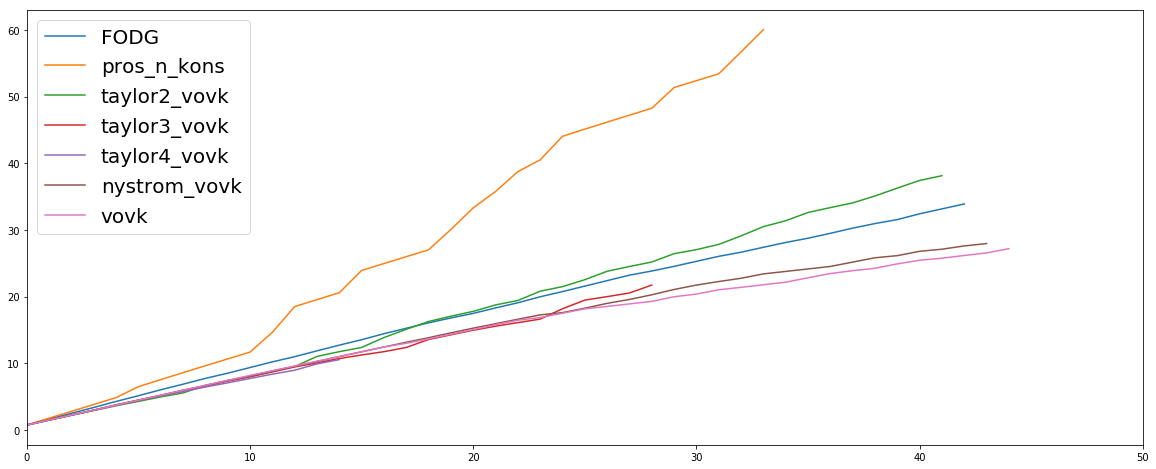

In [13]:
range_t = np.array(range(len(FODG_L)))
df = pd.DataFrame(index=range_t)
df['FODG'] = FODG_L
df['pros_n_kons'] = pros_n_kons_L
df['taylor2_vovk'] = taylor2_vovk_L
df['taylor3_vovk'] = taylor3_vovk_L
df['taylor4_vovk'] = taylor4_vovk_L
df['nystrom_vovk'] = nystrom_vovk_L
df['vovk'] = vovk_L
df.plot(figsize=(20,8), xlim=[0,50])
plt.legend(prop={'size': 20})
plt.show()
df.to_csv("results/adv_d"+str(d)+"_loss")